In [33]:
import os.path as op
import os
import mne
from mne.io import concatenate_raws, read_raw_edf
import pandas as pd
import numpy as np
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

## Dataset
**[EEG dataset of Fusion relaxation and concentration moods](https://data.mendeley.com/datasets/8c26dn6c7w/1) --- 30 subjects**

Fore sessions (EP1, EP2, EP3, EP4) were recorded for each subject. Such that, first two sessions are done on the same day with 1-2 hours interval, and remaining sessions are done after 2-3 days in the same way. Each sessons-> 3 Minutus length. 0-60 sec -> Relax, 60-120 sec -> Concentrate, 120-180 sec -> relax

Each EP is 

***Raw data load in a dataframe where each raw represents a subject and columns are EPISOD***

In [5]:
root = "/Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/"
df_raw = pd.DataFrame
raws = []
for path, dirs, files in os.walk(root):
#     print(path)
    temp = []
    for file in files:
        fname = path + "/" + file
        eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
        temp.append(eeg_raw)
    raws.append(temp)
# print(raws)
df_raw = pd.DataFrame(raws,
               columns =['EP1', 'EP2', 'EP3', 'EP4'])
df_raw = df_raw.dropna() # Contain the raw data of 30 subjects

Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S007/S007E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S007/S007E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S007/S007E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S007/S007E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S008/S008E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S008/S008E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S008/S008E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S030/S030E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S006/S006E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S001/S001E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S001/S001E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S001/S001E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S023/S023E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S023/S023E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S023/S023E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S023/S023E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info 

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S012/S012E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S012/S012E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S012/S012E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S012/S012E04.edf...
EDF file detected
Setting channel info structure...


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in followin

Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S015/S015E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S015/S015E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S014/S014E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S014/S014E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S013/S013E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S013/S013E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S013/S013E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S013/S013E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S022/S022E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S022/S022E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S004/S004E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S004/S004E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S003/S003E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S002/S002E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S002/S002E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S002/S002E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in followin

Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S027/S027E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S027/S027E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S027/S027E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S027/S027E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S018/S018E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S018/S018E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S018/S018E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S020/S020E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S029/S029E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S029/S029E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S029/S029E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S011/S011E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S011/S011E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S011/S011E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S010/S010E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S010/S010E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in followin

Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S010/S010E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S017/S017E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S017/S017E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S017/S017E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S028/S028E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S028/S028E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S028/S028E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S021/S021E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S021/S021E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S021/S021E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S026/S026E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S026/S026E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-ana

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S019/S019E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /Users/raihan/eeg-analysis/data/Emotiv_30s_EDF/S019/S019E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/3649077410.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


## Electrodes
There 14 channels: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, and AF42
#### Plot the signals of a sample subject

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2018-06-13 14:36:26 UTC
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>


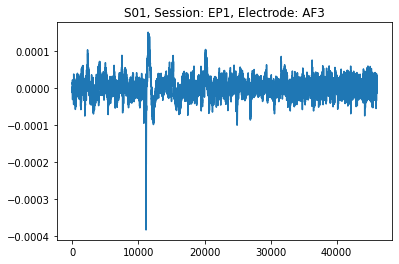

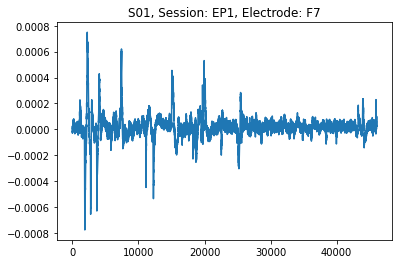

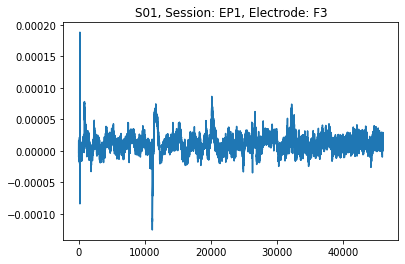

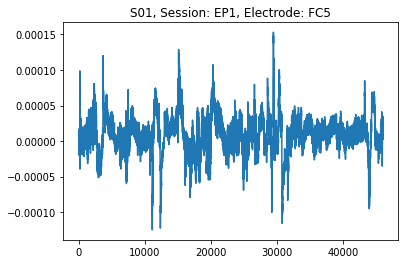

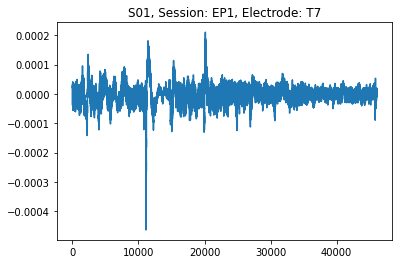

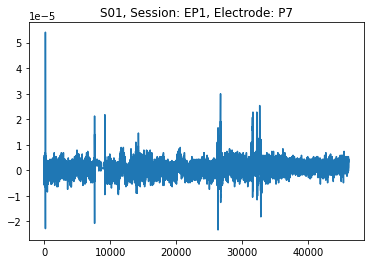

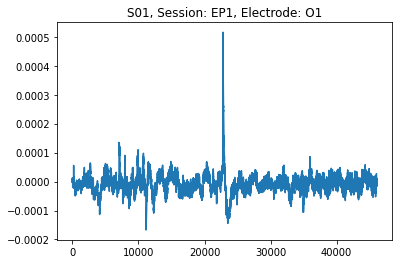

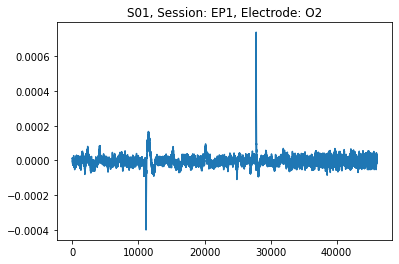

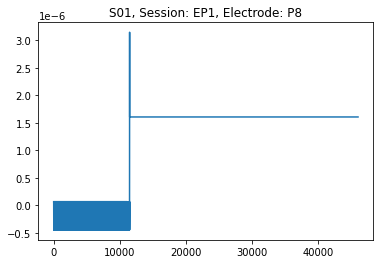

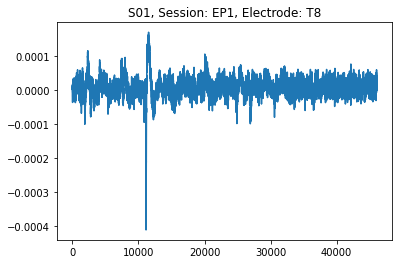

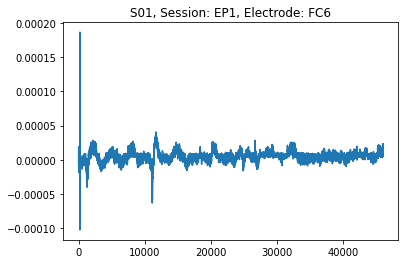

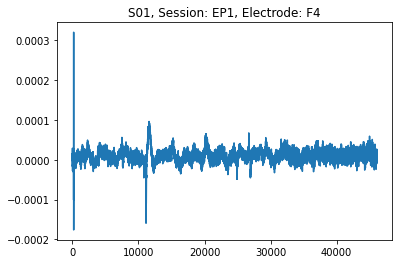

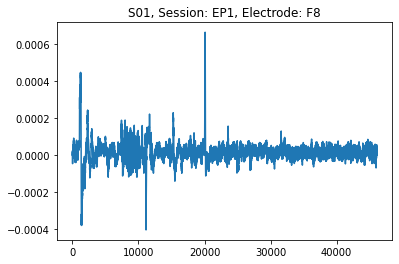

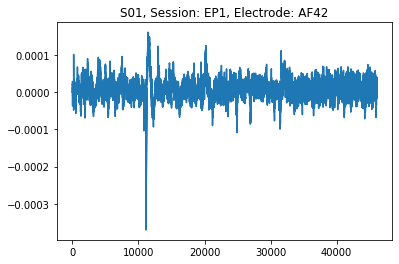

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2018-06-13 14:36:29 UTC
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>


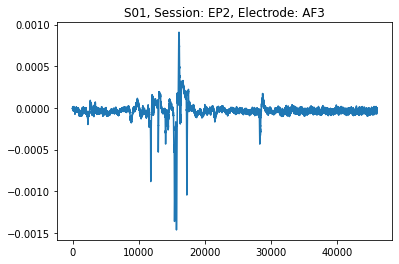

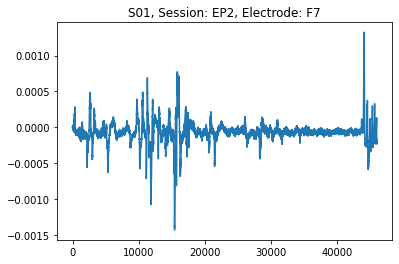

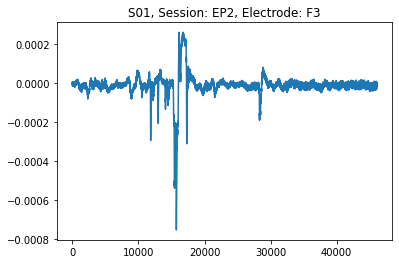

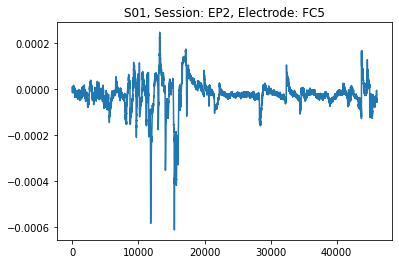

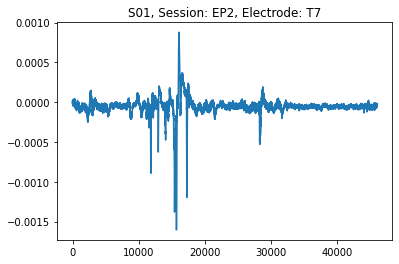

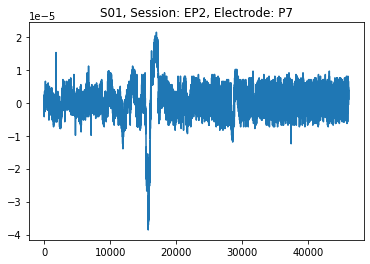

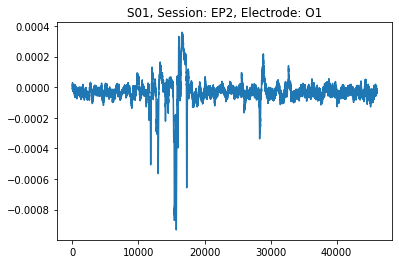

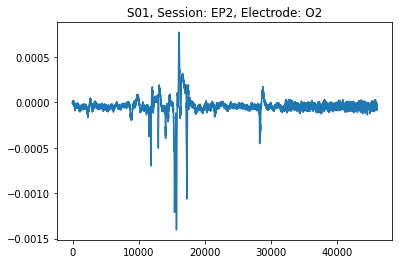

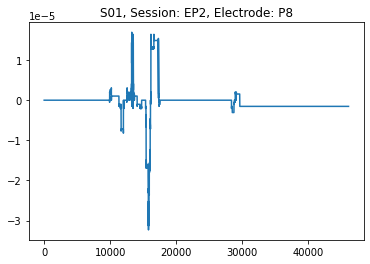

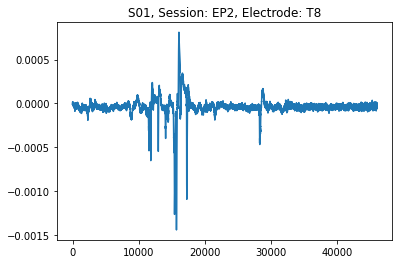

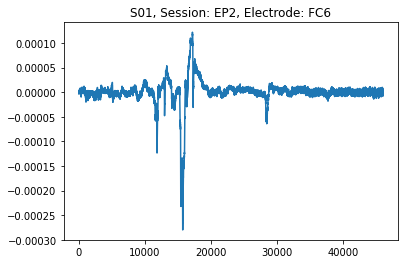

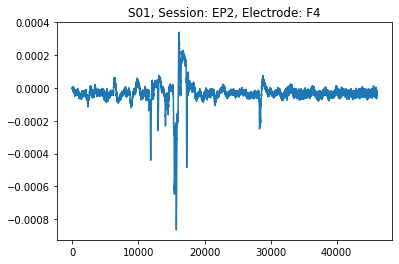

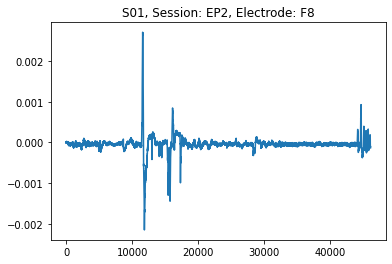

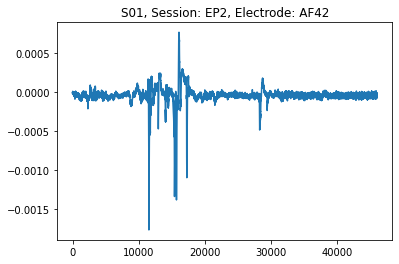

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2018-06-13 14:36:32 UTC
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>


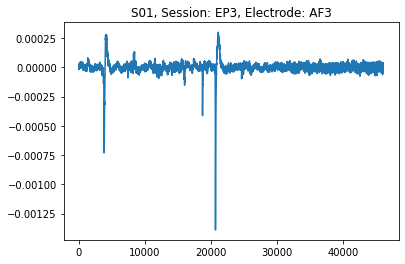

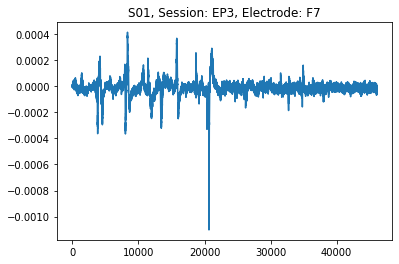

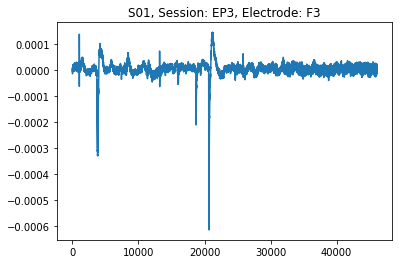

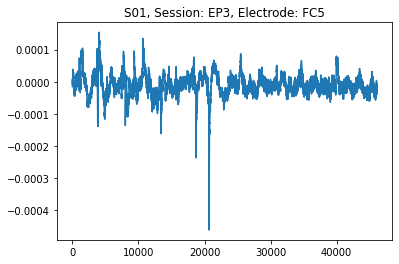

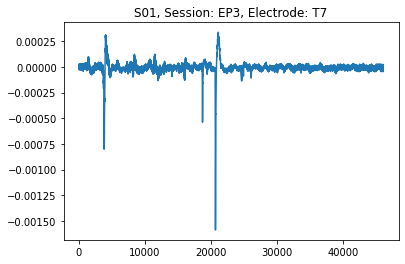

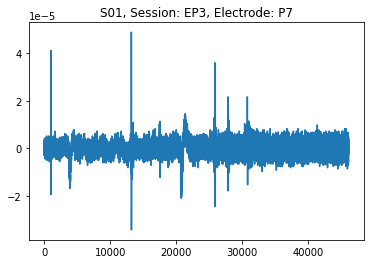

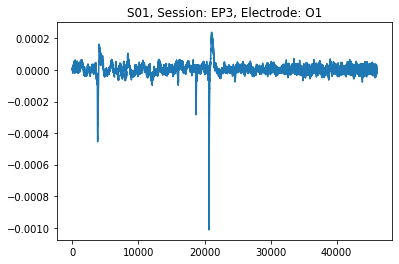

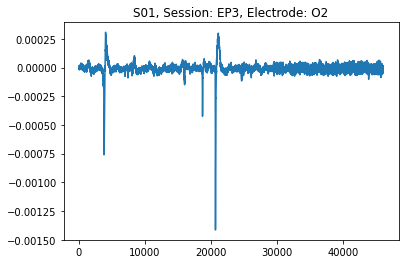

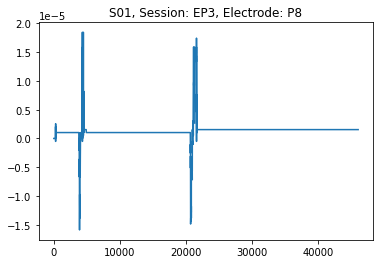

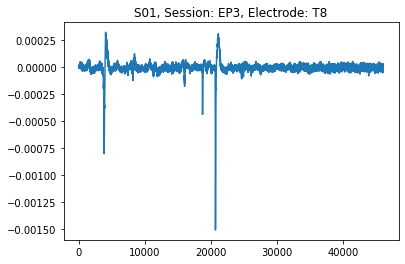

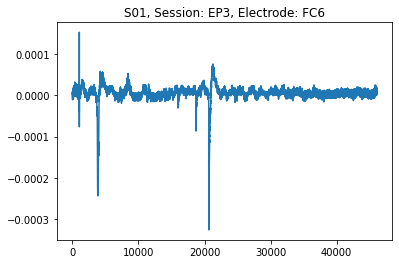

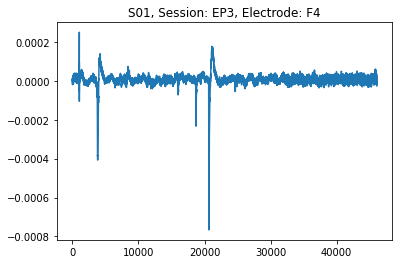

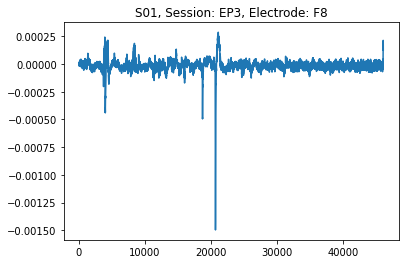

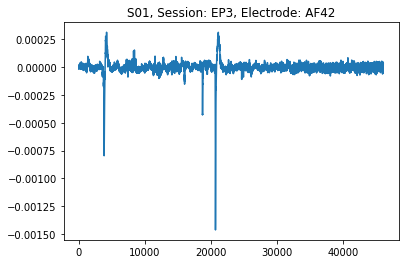

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2018-06-13 14:36:35 UTC
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>


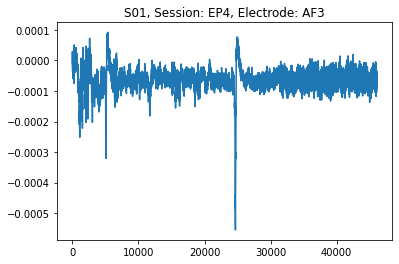

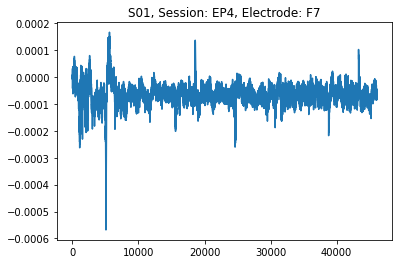

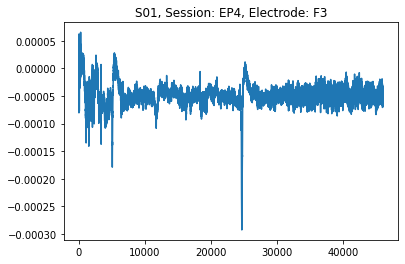

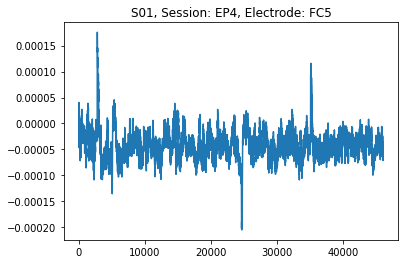

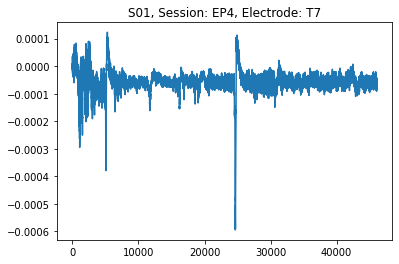

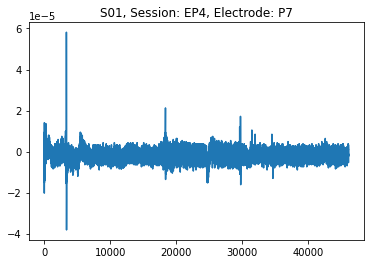

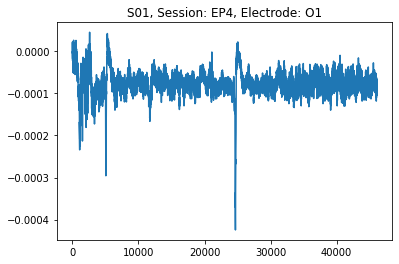

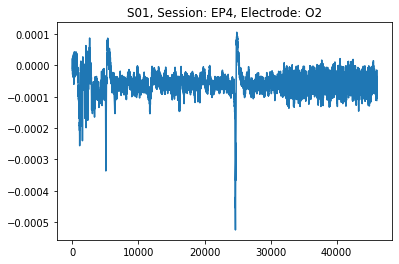

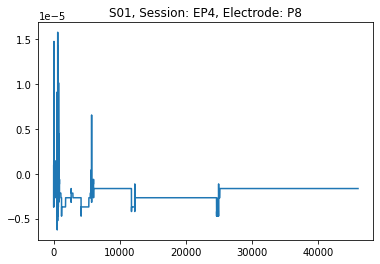

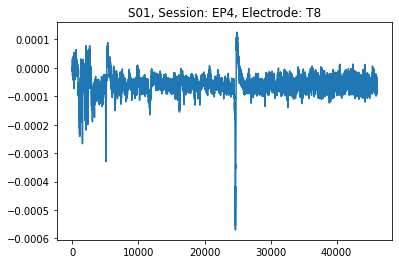

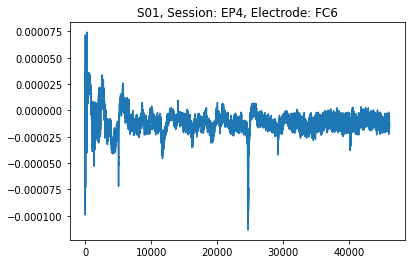

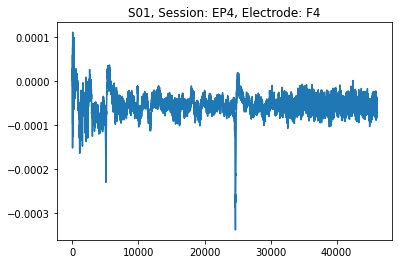

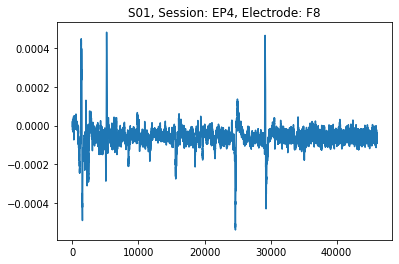

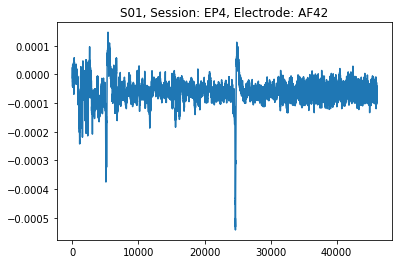

In [6]:
import matplotlib.pyplot as plt
# plt.subplots_adjust(hspace=0.4, wspace=0.4)

chs = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF42']
cols = ['EP1', 'EP2', 'EP3', 'EP4']
s01 = df_raw.iloc[0]
# print(s01['EP1'])
df_selected = df_raw.loc[0:1]
plt_no = 1
for index, row in df_selected.iterrows():
    for col in cols:
        print(row[col].info)
        data = row[col]._data
#         print(data)
        for i in range(len(data)):
#             plt.subplot(7, 4, plt_no)
            plt.plot(data[i,:])
            plt.title("S0" + str(index) + ", Session: " + col + ", Electrode: " + chs[i])
#             plt_no += 1
            plt.show()
#             if(plt_no)
# plt.show()

### Artifacts detection and removal
The environment artifacts and experiment error, which come from external factors, are classified as extrinsic artifacts, whereas the physiological from body itself (e.g., eye blink, muscle activity, heart beat) can be categorized as intrinsic artifacts.
#### Ocular artifacts
##### -> Eye Movements: Eye movements should project mainly to frontal sites with a lowpass time course.
#####  -> Eye Blinks: Eye blinks should project to frontal sites and have large punctate activations.

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/825961930.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


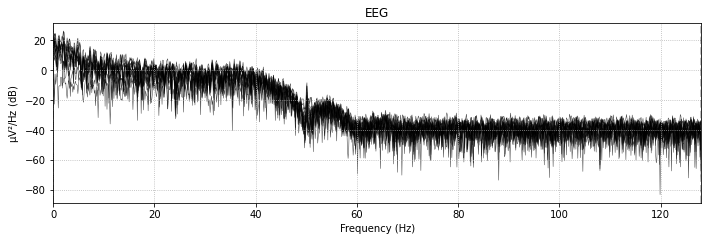

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/825961930.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


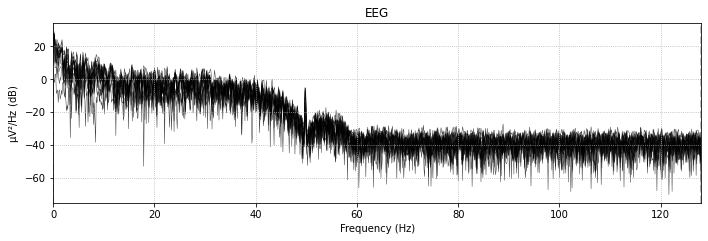

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/825961930.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


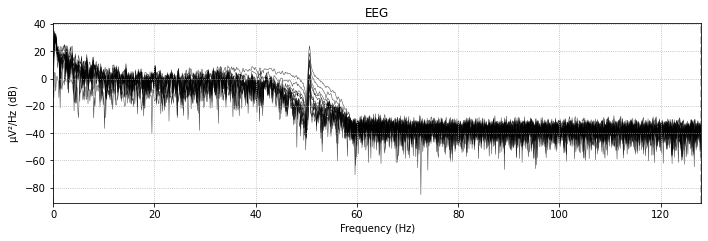

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/825961930.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


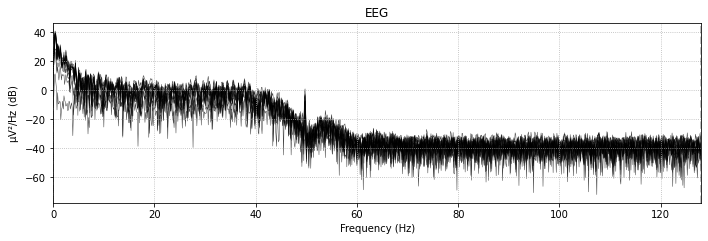

In [26]:
for index, row in df_selected.iterrows():
    for col in cols:
        row[col].info['bads'] = ['P8'] ## Bad Channels
        picks = mne.pick_types(row[col].info, meg='mag', eeg=True, eog=False,
                       stim=False, exclude='bads')
        row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);
        # Removing power-line noise with notch filtering
        

### Experiment on Subject S01 first session

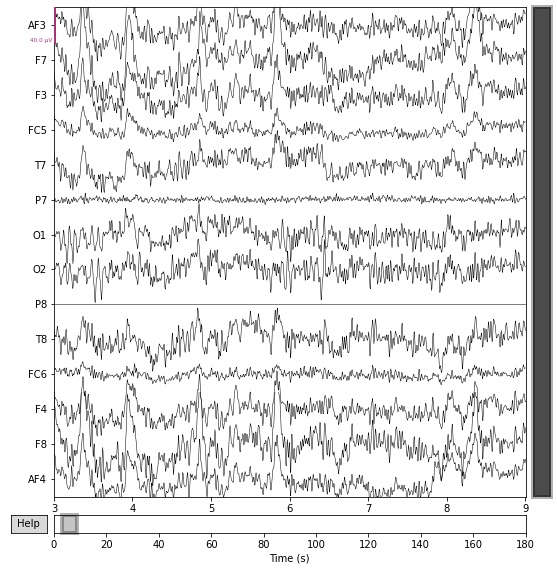

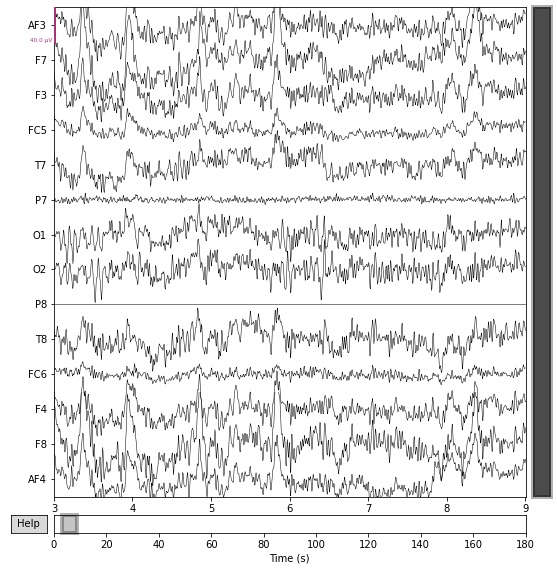

In [88]:
s01 = df_raw.iloc[0]
raw = s01['EP1']
raw.copy().pick_types(eeg=True, stim=True).plot(start=3, duration=6)

#### Sampling, Filtering and Removing power-line noise

Effective window size : 8.000 (s)


/tmp/ipykernel_3046/3862731774.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


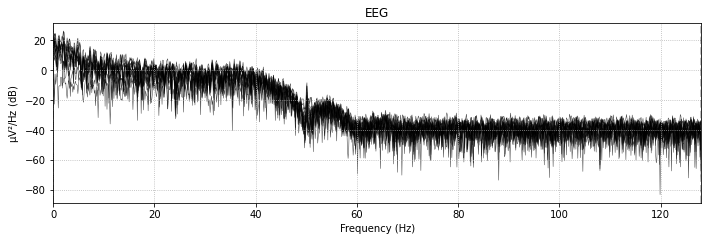

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Effective window size : 8.000 (s)


/tmp/ipykernel_3046/3862731774.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


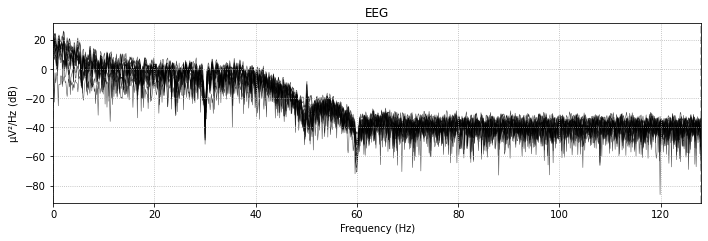

In [5]:
raw.info['bads'] = ['P8'] ## Bad Channels
picks = mne.pick_types(raw.info, meg='mag', eeg=True, eog=False,
               stim=False, exclude='bads')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);
# Removing power-line noise with notch filtering
raw.notch_filter(np.arange(30, 81, 30), picks=picks, filter_length='auto',
                 phase='zero')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);

In [38]:
filt_raw = raw.copy().filter(l_freq=1., h_freq=120.)

ica = ICA(n_components=13, max_iter='auto', random_state=97)
ica.fit(filt_raw)
ica

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 1.5s.


Method,fastica
Fit,41 iterations on raw data (46080 samples)
ICA components,13
Explained variance,100.0 %
Available PCA components,13
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=13, n_times=46080
    Range : 0 ... 46079 =      0.000 ...   179.996 secs
Ready.


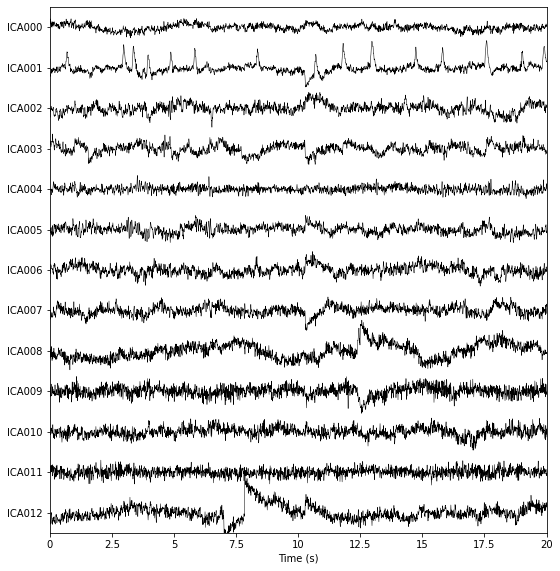

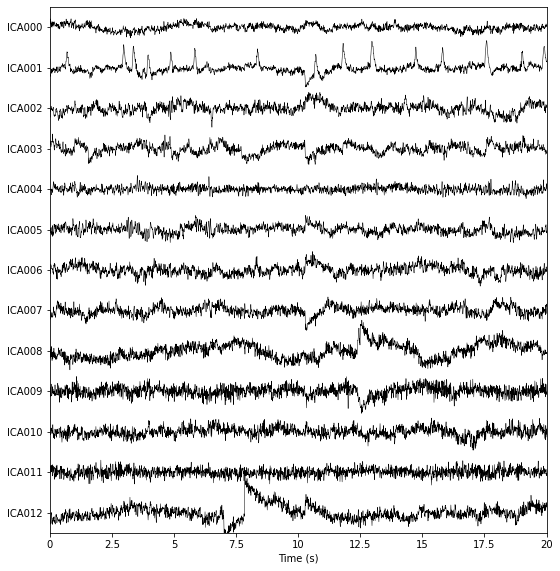

In [40]:
ica.plot_sources(raw, show_scrollbars=False)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 13 PCA components


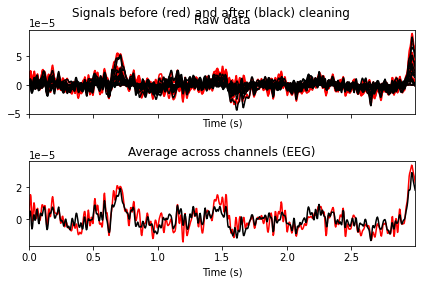

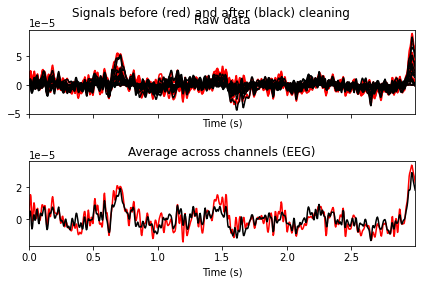

In [41]:
# blinks
ica.plot_overlay(filt_raw, exclude=[0], picks='eeg')

### Features Extraction using Welch method (PSD)

In [21]:
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
[[-109.88148747 -101.82164709 -105.64189362 -108.64166501 -110.41609559
  -111.46452088 -112.65314861 -113.79718108 -113.88433643 -115.17498175
  -115.6714184  -115.97059853 -117.23714481 -118.52310291 -118.01262857
  -117.56706858 -118.12037069 -117.83787659 -118.36056517 -119.41521623
  -120.2559712  -120.90630505 -120.32649023 -120.60793344 -121.00164905
  -120.77346595 -120.43733548 -120.31550894 -120.2520736  -121.37944198
  -125.15700574 -122.07654993 -121.78335677 -121.88497753 -122.37603819
  -122.34728204 -122.97921267 -123.57893568 -124.2195718  -124.73426506
  -125.45159562 -126.74002778 -127.88054124 -128.98266073 -130.57185856
  -132.58384888 -134.94591905 -137.4871676  -141.6669552  -141.29837572
  -137.72379249 -145.08646999 -146.35063324 -145.04825929 -144.80913276
  -145.49157342 -146.48161678 -148.65543632 -150.36046599 -152.43304464
  -153.64816334]
 [-107.82686776  -99.87226963 -103.38880355 -106.15

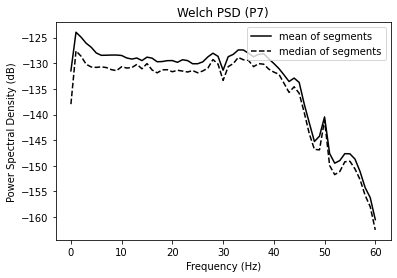

In [29]:
# Estimate PSDs based on "mean" and "median" averaging for comparison.
kwargs = dict(fmin=0, fmax=60, n_jobs=1)
psds_welch_mean, freqs_mean = psd_welch(raw, average='mean', **kwargs)
psds_welch_median, freqs_median = psd_welch(raw, average='median', **kwargs)

# Convert power to dB scale.
psds_welch_mean = 10 * np.log10(psds_welch_mean)
psds_welch_median = 10 * np.log10(psds_welch_median)
print(psds_welch_mean)
print(freqs_mean)
# We will only plot the PSD for a single sensor.
ch_name = 'P7'
ch_idx = raw.info['ch_names'].index(ch_name)

_, ax = plt.subplots()
ax.plot(freqs_mean, psds_welch_mean[ch_idx, :], color='k',
        ls='-', label='mean of segments')
ax.plot(freqs_median, psds_welch_median[ch_idx, :], color='k',
        ls='--', label='median of segments')

ax.set(title='Welch PSD ({})'.format(ch_name),
       xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB)')
ax.legend(loc='upper right')
plt.show()

In [55]:
def feature_extract(raw):
    raw.info['bads'] = ['P8'] ## Bad Channels
    picks = mne.pick_types(raw.info, meg='mag', eeg=True, eog=False,
                   stim=False, exclude='bads')
    ica = ICA(n_components=13, max_iter='auto', random_state=97) # ICA 
    psds = []
    targets = [0, 1, 0] # 0-> relax, 1-> concentrate
    raw_cp = raw.copy()
    for i in range(0,3):
#         start, stop = raw.time_as_index([0+60*i, 60+60*i])  # 0 s to 60 s data segment
#         _data, _times = raw[:180, start:stop]
        _seg = raw_cp.crop(tmin=0+60*i, tmax= 60+60*i-0.1, include_tmax=True)
        # Removing power-line noise with notch filtering
        raw.notch_filter(np.arange(30, 81, 30), picks=picks, filter_length='auto',
                         phase='zero')
        ## Apply ICA
        ica.fit(_seg)
        ica.apply(_seg)
        # Estimate PSDs based on "mean" for comparison.
        kwargs = dict(fmin=0, fmax=128, n_jobs=1)
        psds_welch_mean, freqs_mean = psd_welch(_seg, average='mean', **kwargs)
        # Convert power to dB scale.
        psds_welch_mean = 10 * np.log10(psds_welch_mean)
        psds.append(psds_welch_mean)
        del raw_cp
        raw_cp = raw.copy()
#     print(len(psds))
#     data_df = pd.DataFrame(psds, columns=['feature_matrix'])
    return psds, targets

        
    

### Training and testing matrix 

In [77]:
X = []
Y = []
for index, row in df_raw.iterrows():
    for col in cols:
#         print(row[col].info)
        psds, target = feature_extract(row[col])
        X = X + psds
        Y = Y + target
print(len(X), len(Y))
        

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 2.0s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 1.9s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 1.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter



/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)



Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)



Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 1.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 2.0s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 2.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 3.0s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)



Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Up

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter



/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Up

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter



/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter



/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 1.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Up

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-p

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 1.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
----

/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Selecting by number: 13 components
Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 4.0s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



/Users/raihan/eeg-analysis/env/notebookenv/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components


/var/folders/03/74z61l_53x195877m77qp5lm0000gn/T/ipykernel_43967/2346298635.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(_seg)


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 13 PCA components
Effective window size : 1.000 (s)
360 360


## Test Train spliting

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(241, 13, 129) (241,) (119, 13, 129) (119,)


### Train model

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [87]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(13,129)))
model.add(Dense(units = 256, activation = 'sigmoid'))
model.add(Dense(units = 64, activation = 'sigmoid'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))

In [88]:
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['accuracy'])

model.fit(x=X_train,y=y_train, epochs=10)

model.evaluate(X_test, y_test)

Epoch 1/10
8/8 [==============================] - 1s 11ms/step - loss: 0.2601 - accuracy: 0.6100
Epoch 2/10
8/8 [==============================] - 0s 15ms/step - loss: 0.2324 - accuracy: 0.6598
Epoch 3/10
8/8 [==============================] - 0s 16ms/step - loss: 0.2265 - accuracy: 0.6598
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 0.2267 - accuracy: 0.6598
Epoch 5/10
8/8 [==============================] - 0s 16ms/step - loss: 0.2332 - accuracy: 0.6349
Epoch 6/10
8/8 [==============================] - 0s 14ms/step - loss: 0.2424 - accuracy: 0.6390
Epoch 7/10
8/8 [==============================] - 0s 17ms/step - loss: 0.2377 - accuracy: 0.5851
Epoch 8/10
8/8 [==============================] - 0s 15ms/step - loss: 0.2328 - accuracy: 0.6598
Epoch 9/10
8/8 [==============================] - 0s 14ms/step - loss: 0.2326 - accuracy: 0.6598
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2192 - accuracy: 0.6807


[0.2192281186580658, 0.680672287940979]